1. Wczytaj dane ze wszystkich plików do pojedynczej tablicy (używając Pandas).

In [1]:
import pandas as pd
import os
import re

directory_path = 'data'  # Replace this with your directory containing the text files
txt_files = [f for f in os.listdir(directory_path) if f.endswith('.txt')]

# Initialize an empty list to store DataFrames for each file
dfs = []
combined_df = pd.DataFrame()
# Read each file and store it in the list with a unique identifier
for i, file in enumerate(txt_files):
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path, header=None)
    df.columns = ['Name', 'Gender', 'Count']
    year = re.findall(r'\d+', file)[0]
    df['Year'] = year
    dfs.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [2]:
combined_df

,Name,Gender,Count,Year
0,Lisa,F,49537,1968
1,Michelle,F,33222,1968
2,Kimberly,F,31908,1968
3,Jennifer,F,26850,1968
4,Melissa,F,21727,1968
...,...,...,...,...
2085153,Yarnell,M,5,1966
2085154,Yolanda,M,5,1966
2085155,Yvon,M,5,1966
2085156,Zalman,M,5,1966


2. Określi ile różnych (unikalnych) imion zostało nadanych w tym czasie.

In [3]:
# unikalne imiona z podziałem na lata
pivot_table = combined_df.pivot_table(values='Name', index='Year', aggfunc='count')
print(pivot_table)

# unikalne imiona ogółem
len(combined_df['Name'].unique())

       Name
Year       
1880   2000
1881   1934
1882   2127
1883   2084
1884   2297
...     ...
2018  32221
2019  32109
2020  31517
2021  31685
2022  31915

[143 rows x 1 columns]


102449

3. Określi ile różnych (unikalnych) imion zostało nadanych w tym czasie rozróżniając imiona męskie i żeńskie.

In [4]:
# unikalne imiona z podziałem na lata i płeć
pivot_table = combined_df.pivot_table(values='Name', index='Year', columns='Gender', aggfunc=pd.Series.nunique)
print(pivot_table)

# unikalne imiona z podziałem na płeć ogółem
pivot_table = combined_df.pivot_table(values='Name', index='Gender', aggfunc=pd.Series.nunique)
print(pivot_table)  

Gender      F      M
Year                
1880      942   1058
1881      938    996
1882     1028   1099
1883     1054   1030
1884     1172   1125
...       ...    ...
2018    18126  14095
2019    17997  14112
2020    17485  14032
2021    17628  14057
2022    17660  14255

[143 rows x 2 columns]
         Name
Gender       
F       70227
M       43655


4. Stwórz nowe kolumny frequency_male i frequency_female i określ popularność każdego z imion w danym każdym roku dzieląc liczbę razy, kiedy imię zostało nadane przez całkowita liczbę urodzeń dla danej płci.

In [5]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc=sum)
pivot_table

Gender,F,M
Year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


In [6]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc=sum)
print(pivot_table)

# Słownik z uwagi na szybszy dostęp do danych
pivot_dict = pivot_table.to_dict()


def calculate_frequency(row):
    year = row['Year']
    gender = row['Gender']

    frequency  = row['Count'] / pivot_dict[gender][year]
    
    if gender == 'F':
        return None, frequency
    if gender == 'M':
        return frequency, None

# Apply the function to the DataFrame
combined_df[['Frequency_male', 'Frequency_female']] = combined_df.apply(calculate_frequency, axis=1, result_type='expand')

combined_df.head()

Gender        F        M
Year                    
1880      90994   110490
1881      91953   100737
1882     107847   113686
1883     112320   104625
1884     129019   114442
...         ...      ...
2018    1698373  1813377
2019    1675139  1790682
2020    1612393  1721588
2021    1635800  1743913
2022    1628730  1733166

[143 rows x 2 columns]


,Name,Gender,Count,Year,Frequency_male,Frequency_female
0,Lisa,F,49537,1968,NaN,0.030200
1,Michelle,F,33222,1968,NaN,0.020254
2,Kimberly,F,31908,1968,NaN,0.019452
3,Jennifer,F,26850,1968,NaN,0.016369
4,Melissa,F,21727,1968,NaN,0.013246


5. Określ i wyświetl wykres złożony z dwóch podwykresów, gdzie osią x jest skala czasu, a oś y reprezentuje:

- liczbę urodzin w danym roku (wykres na górze)
- stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku(wykres na dole) W którym roku zanotowano najmniejszą, a w którym największą różnicę w liczbie urodzeń między chłopcami a dziewczynkami (pytanie dotyczy podwykresu przedstawiającego stosunek liczby urodzin)? Odpowiedź wyznacz i wyświetl na ekranie


In [7]:
import matplotlib.pyplot as plt

In [8]:
pivot_table = combined_df.pivot_table(values='Count', columns=['Gender'], index='Year', aggfunc='sum')
ratio_girls_to_boys = pivot_table['F'] / pivot_table['M'].values.astype(int)

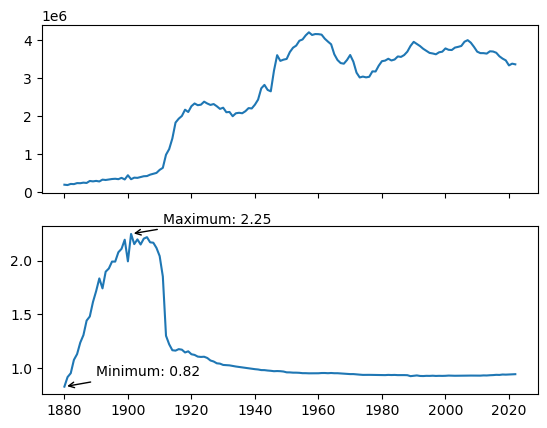

In [9]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', aggfunc='sum')
# print(pivot_table)

fig, ax = plt.subplots(2, sharex=True)

years = pivot_table.index
counts = pivot_table.values

ax[0].plot(years, counts)

ax[1].plot(years, ratio_girls_to_boys)
ax[1].xaxis.set_ticks(years[::20])

ratio_girls_to_boys.idxmin()
ratio_girls_to_boys.idxmax()


min_index = int(ratio_girls_to_boys.idxmin()) - int(years[0])
min_value = ratio_girls_to_boys.min()

ax[1].annotate(f'Minimum: {min_value:.2f}', xy=(min_index, min_value), xytext=(min_index + 10, min_value + 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'))


max_index = int(ratio_girls_to_boys.idxmax()) - int(years[0])
max_value = ratio_girls_to_boys.max()

ax[1].annotate(f'Maximum: {max_value:.2f}', xy=(max_index, max_value), xytext=(max_index + 10, max_value + 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


6. Wyznacz 1000 najpopularniejszych imion dla każdej płci w całym zakresie czasowym, metoda powinna polegać na wyznaczeniu 1000 najpopularniejszych imion dla każdego roku i dla każdej płci osobno. Jako najpopularniejsze należy uznać imiona, które najdłużej zajmowały wysokie miejsce na liście rankingowej, żeby uniknąć wpływu liczny urodzin w danym roku na wynik (liczba urodzin spada stąd, nieprawidłowo przeprowadzona procedura może powodować że imiona nadawane w wyżu i stosowane w tym czasie zdominują ranking) proszę ranking Top1000 określić jako sumę ważoną względnej popularności danego imienia w danym roku (patrz pkt 4)
     


In [10]:
frequency = 'Frequency_male'
top_male_names = combined_df.loc[combined_df['Gender'] == 'M'].groupby('Year').apply(lambda x: x.nlargest(n=1000, columns=frequency)).reset_index(drop=True)
top_male_names_pivot = top_male_names.pivot_table(values=frequency, index='Name', aggfunc='sum')
top_male_names_pivot = top_male_names_pivot.sort_values(by=frequency, ascending=False)[:1000]
top_male_names_pivot.columns = ['Frequency * count']
top_male_names_pivot

frequency = 'Frequency_female'
top_female_names = combined_df.loc[combined_df['Gender'] == 'F'].groupby('Year').apply(lambda x: x.nlargest(n=1000, columns=frequency)).reset_index(drop=True)
top_female_names_pivot = top_female_names.pivot_table(values=frequency, index='Name', aggfunc='sum')
top_female_names_pivot = top_female_names_pivot.sort_values(by=frequency, ascending=False)[:1000]
top_female_names_pivot.columns = ['Frequency * count']
top_female_names_pivot


,Frequency * count
Name,
Mary,4.749131
Elizabeth,1.543251
Margaret,1.443219
Anna,1.304498
Helen,1.299765
...,...
Jenifer,0.014003
Luz,0.014000
Aisha,0.013998


7. Wyświetl na jednym wykresie zmiany dla imienia męskiego John i pierwszego imienia żeńskiego rankingu top-1000 (zaopatrz wykres w odpowiednią legendę):

- na osi Y po lewej liczbę razy kiedy imę zostało nadane w każdym roku (wyświetl ile razy nadano to imię w 1934, 1980 i 2022r)?
- na osi Y po prawej popularność tych imion w każdym z tych lat


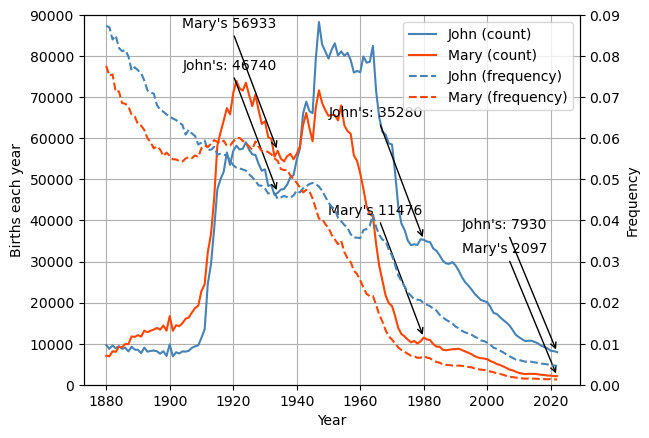

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

john_data = combined_df.loc[(combined_df['Name'] == 'John') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)

female_top_name = top_female_names_pivot.iloc[0].name
female_top_name_data = combined_df.loc[(combined_df['Name'] == female_top_name) & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)


# Plot count
john_data.plot(x='Year', y='Count', color='steelblue', ax=ax, label='John (count)')
female_top_name_data.plot(x='Year', y='Count', color='orangered', ax=ax, label=f'{female_top_name} (count)')

#Plot frequency
john_data.plot('Year', 'Frequency_male', color='steelblue', linestyle='--', ax=ax2, label='John (frequency)')
female_top_name_data.plot(x='Year', y='Frequency_female', color='orangered', linestyle='--', ax=ax2, label=f'{female_top_name} (frequency)')

# Capturing handles and labels for both legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2


ax.legend(handles, labels, loc='best')
ax2.legend().remove()

ax.set_ylabel('Births each year')
ax2.set_ylabel('Frequency')

ax.set_ylim([0, 90_000])
ax2.set_ylim([0, 0.09])

ax.grid()

for year in ['1934', '1980', '2022']:
    john_count = john_data.loc[john_data['Year'] == year]['Count'].values[0]
    mary_count = female_top_name_data.loc[female_top_name_data['Year'] == year]['Count'].values[0]
    
    idx = john_data.loc[john_data['Year'] == year]['Count'].index.values[0]

    ax.annotate(f'John\'s: {john_count}', xy=(idx, john_count), xytext=(idx - 30, john_count + 30_000),
                   arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    ax.annotate(f'Mary\'s {mary_count}', xy=(idx, mary_count), xytext=(idx - 30, mary_count + 30_000),
                arrowprops=dict(facecolor='green', arrowstyle='->'))

plt.show()

8. Wykreśl wykres z podziałem na lata i płeć zawierający informację jaki procent w danym roku stanowiły imiona należące do rankingu top1000 (wyznaczonego dla całego zbioru (pkt 6)). Wykres ten opisuje różnorodność imion, wyświetl rok, w którym zaobserwowano największą różnicę w różnorodności między imionami męskimi a żeńskimi .

In [12]:
def intersection(x, values):
    return len(set(values).intersection(set(x))) / len(x) * 100

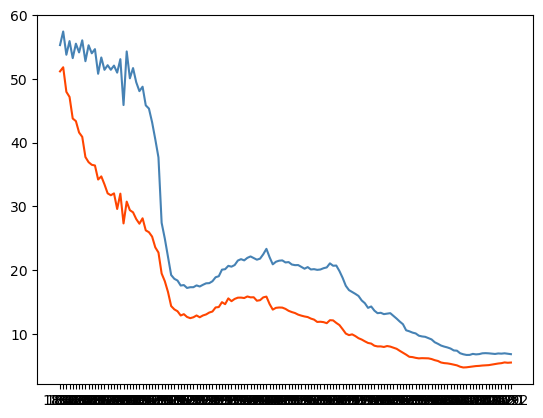

In [13]:

male_intersection = combined_df.loc[combined_df['Gender'] == 'M'].groupby('Year')['Name'].apply(intersection, top_male_names_pivot.index.values)

female_intersection = combined_df.loc[combined_df['Gender'] == 'F'].groupby('Year')['Name'].apply(intersection, top_female_names_pivot.index.values)

fig, ax = plt.subplots()

ax.plot(male_intersection, color='steelblue')
ax.plot(female_intersection, color='orangered')

9. Zweryfikuj hipotezę czy prawdą jest, że w obserwowanym okresie rozkład ostatnich liter imion męskich uległ istotnej zmianie? W tym celu

- dokonaj agregacji wszystkich urodzeń w pełnym zbiorze danych z podziałem na rok i płeć i ostatnią literę,
- wyodrębnij dane dla lat 1917, 1967, 2022
- znormalizuj dane względem całkowitej liczby urodzin w danym roku
- wyświetl dane popularności litery dla mężczyzn w postaci wykresu słupkowego zawierającego poszczególne lata i gdzie słupki grupowane są wg litery. Wyświetl, dla której litery wystąpił największy wzrost/spadek między rokiem 1917 a 2022)
- Dla 3 liter dla których zaobserwowano największą zmianę wyświetl przebieg trendu popularności w maksymalnym przedziale czasu


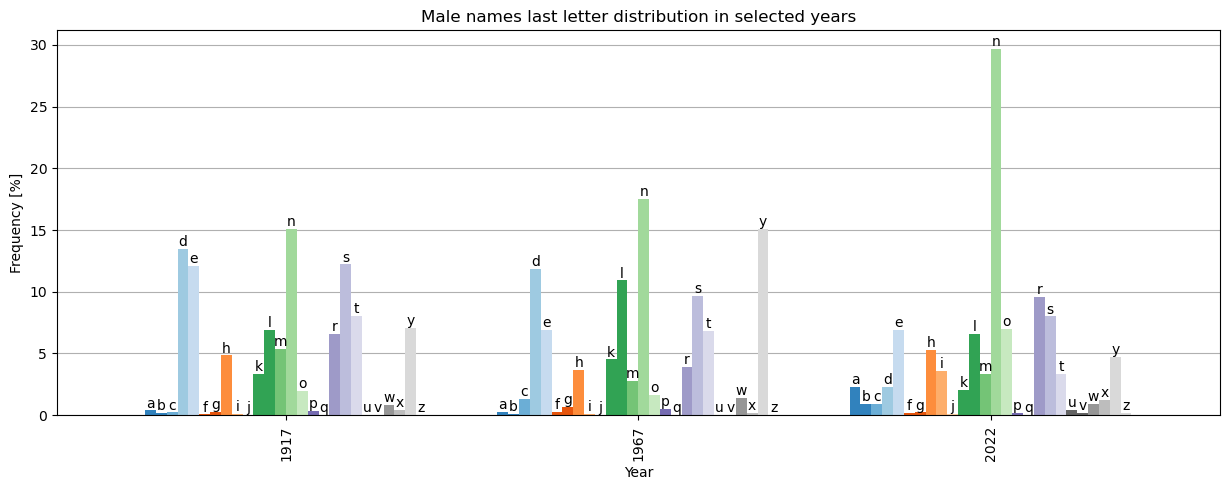

In [15]:
import numpy as np
# last = combined_df['Name'].apply(last_letter).copy()
last = pd.DataFrame(combined_df[['Year', 'Name', 'Count', 'Gender']])
last['Letter'] = last['Name'].apply(lambda x: x[-1])

# - dokonaj agregacji wszystkich urodzeń w pełnym zbiorze danych z podziałem na rok i płeć i ostatnią literę,
last_pivot = last.pivot_table(values='Count', index=['Year', 'Gender'], columns='Letter', aggfunc='sum').fillna(0)

# - znormalizuj dane względem całkowitej liczby urodzin w danym roku
last_pivot = last_pivot.div(last_pivot.sum(axis=1), axis=0) * 100
last_pivot
# last_pivot.sum(axis=1) # testing if sum is equal to 100% in each gender each year
# - wyodrębnij dane dla lat 1917, 1967, 2022
years = ['1917', '1967', '2022']

# cross section from Male gender, then years are selected from the index
selected_years_M = last_pivot.xs('M', level='Gender').loc[years]
selected_years_M

selected_years_M.plot(kind='bar', stacked=False, legend=False, figsize=(15, 5), width=0.8, colormap='tab20c')
# Get the current axes
ax = plt.gca()

# Get the x-axis tick positions and labels
x_ticks = ax.get_xticks()
x_labels = ax.get_xticklabels()

# Loop through each bar and label it with the corresponding letter
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = selected_years_M.columns[ i // len(years)] # floor operation to get the index of the letter from the column names
    # label = i
    ax.text(x, y, label, ha='center', va='bottom')

plt.title('Male names last letter distribution in selected years')
ax.yaxis.set_label_text('Frequency [%]')
ax.grid(axis='y')
ax.set_axisbelow(True)
# Show the plot
plt.show()


Letter
n    7.826477
d    6.052899
y    5.414203
dtype: float64


Text(0.5, 1.0, 'Male names last letters with largest standard deviation')

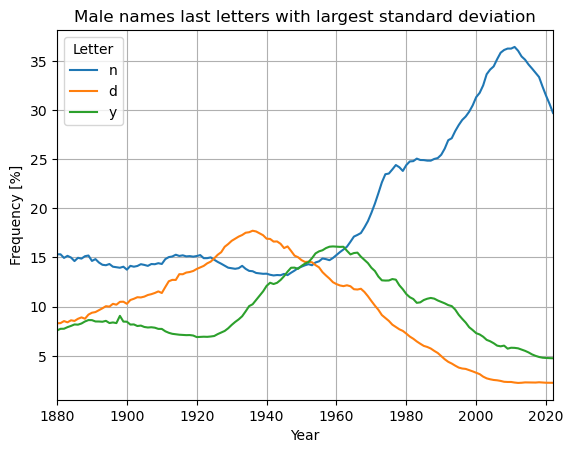

In [16]:
# - Dla 3 liter dla których zaobserwowano największą zmianę wyświetl przebieg trendu popularności w maksymalnym przedziale czasu

largest_deviations = selected_years_M.std().nlargest(3)
print(largest_deviations)

n_letters = largest_deviations.index.values

# last_pivot.xs('M', level='Gender').loc[years]
largest_deviations_data = last_pivot[n_letters].xs('M', level='Gender')

last_pivot[n_letters].xs('M', level='Gender').plot()

ax = plt.gca()
ax.yaxis.set_label_text('Frequency [%]')
ax.grid()

plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Male names last letters with largest standard deviation')

10. Znajdź w rankingu top1000 imiona, które nadawane były zarówno dziewczynkom jak i chłopcom (stosunek nadanych imion męskich i żeńskich). Wyznacz 2 imiona, dla których zaobserwowano największą zmianę (definiowanej jako największa różnica stosunku imion męskich do żeńskich w badanych latach). Do analizy zmiany wykorzystaj 2 przedziały: zagregowane dane do roku 1930 i od roku 2000.

In [18]:
neutral_names = set(top_female_names['Name'].values).intersection(set(top_male_names['Name'].values))

In [19]:
'Zion' in top_female_names['Name'].values

True

In [20]:
neutral_names

{'Aaron',
 'Abbie',
 'Ada',
 'Addie',
 'Addison',
 'Adrian',
 'Agnes',
 'Akira',
 'Alba',
 'Albert',
 'Alex',
 'Alexander',
 'Alexis',
 'Ali',
 'Alice',
 'Allie',
 'Allison',
 'Allyn',
 'Alma',
 'Alpha',
 'Alta',
 'Alva',
 'Amanda',
 'Amari',
 'Amiri',
 'Amy',
 'Andra',
 'Andrea',
 'Andrew',
 'Angel',
 'Angela',
 'Ann',
 'Anna',
 'Annie',
 'Anthony',
 'Antonia',
 'Ardell',
 'Arden',
 'Ari',
 'Ariel',
 'Arley',
 'Arlie',
 'Armani',
 'Arthur',
 'Artie',
 'Ashley',
 'Ashton',
 'Atha',
 'Aubrey',
 'Audie',
 'Audrey',
 'August',
 'Augusta',
 'Augustine',
 'Austin',
 'Austyn',
 'Avery',
 'Azariah',
 'Baby',
 'Bailey',
 'Barbara',
 'Barrie',
 'Baylor',
 'Beatrice',
 'Bee',
 'Bell',
 'Bellamy',
 'Bennie',
 'Bentley',
 'Berkley',
 'Bernice',
 'Bert',
 'Bertha',
 'Bertie',
 'Beryl',
 'Bessie',
 'Bethel',
 'Betty',
 'Beulah',
 'Beverly',
 'Billie',
 'Billy',
 'Bird',
 'Blair',
 'Blake',
 'Blanche',
 'Bobbie',
 'Bobby',
 'Bonnie',
 'Brandon',
 'Brandy',
 'Brenda',
 'Brett',
 'Brian',
 'Briar',
 'B

In [ ]:
first_range.loc[first_range['Name'].isin(neutral_names)]

,Name,Gender,Count,Year,Frequency_male,Frequency_female
12942,Mary,F,14275,1903,NaN,0.054491
12943,Helen,F,6129,1903,NaN,0.023396
12944,Anna,F,5098,1903,NaN,0.019460
12945,Margaret,F,5046,1903,NaN,0.019262
12946,Ruth,F,4517,1903,NaN,0.017242
...,...,...,...,...,...,...
2072753,Mabel,M,5,1924,0.000004,NaN
2072763,Marilyn,M,5,1924,0.000004,NaN
2072785,Michal,M,5,1924,0.000004,NaN
2072854,Randy,M,5,1924,0.000004,NaN


In [ ]:
neutral_first_df.loc[neutral_first_df['Name'] == 'Zion']

,Name,Gender,Count,Year,Frequency_male,Frequency_female
1124529,Zion,M,6,1917,0.000006,NaN


In [21]:
combined_df = combined_df.astype({'Year':'int'})

first_range     = combined_df.loc[combined_df['Year'] <= 1930]
second_range    = combined_df.loc[combined_df['Year'] >= 2000]


first_values = first_range.loc[first_range['Name'].isin(neutral_names)].pivot_table(values='Count', index='Name', aggfunc='sum')
second_values = second_range.loc[second_range['Name'].isin(neutral_names)].pivot_table(values='Count', index='Name', aggfunc='sum')

print(len(first_values))
print(len(second_values))

print(len(second_values - first_values))


print(second_values - first_values)

first_values

643
711
734
             Count
Name              
Aaron     158278.0
Abbie       1741.0
Ada       -42286.0
Addie     -23814.0
Addison   139190.0
...            ...
William  -703427.0
Willie   -238849.0
Winifred  -27871.0
Winnie    -10208.0
Zion       43657.0

[734 rows x 1 columns]


,Count
Name,
Aaron,14110
Abbie,5388
Ada,59539
Addie,28451
Addison,1592
...,...
William,1094277
Willie,247724
Winifred,29904


Biggest change in ratio man to woman:  Madison, Lauren


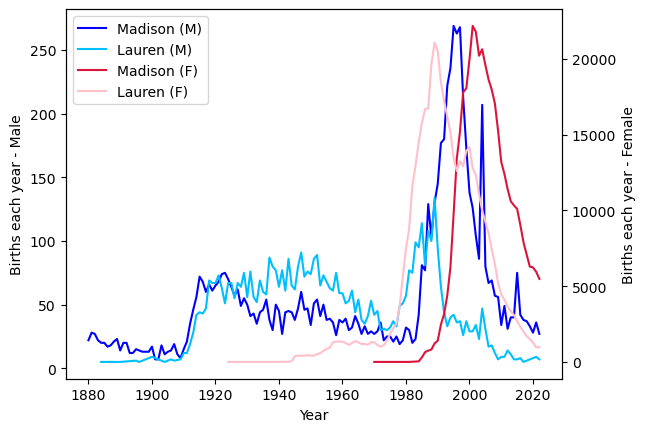

In [114]:
neutral_first_df  = first_range.loc[first_range['Name'].isin(neutral_names)]
neutral_first_pivot = neutral_first_df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')
# neutral_first_pivot.apply(lambda x: x / x.sum() * 100, axis=1)
neutral_first_pivot = neutral_first_pivot.fillna(0)
neutral_first_pivot

neutral_second_df  = second_range.loc[second_range['Name'].isin(neutral_names)]
neutral_second_pivot = neutral_second_df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')
# neutral_first_pivot.apply(lambda x: x / x.sum() * 100, axis=1)
neutral_second_pivot = neutral_second_pivot.fillna(0)
neutral_second_pivot


neutral_first_pivot['Diff']    = abs(neutral_first_pivot['M'] - neutral_first_pivot['F'])
neutral_second_pivot['Diff']   = abs(neutral_second_pivot['M'] - neutral_second_pivot['F'])

neutral_first_pivot['Ratio']    = neutral_first_pivot['M'] / (neutral_first_pivot['F'] + neutral_first_pivot['M'])
neutral_second_pivot['Ratio']    = neutral_second_pivot['M'] / (neutral_second_pivot['F'] + neutral_second_pivot['M'])

diff = neutral_second_pivot['Ratio'] - neutral_first_pivot['Ratio']
diff.nlargest(2)

print('Biggest change in ratio man to woman: ', ', '.join(diff.abs().nlargest(2).index.values))

madison_m = combined_df.loc[(combined_df['Name'] == 'Madison') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)
madison_f = combined_df.loc[(combined_df['Name'] == 'Madison') & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)

lauren_m = combined_df.loc[(combined_df['Name'] == 'Lauren') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)
lauren_f = combined_df.loc[(combined_df['Name'] == 'Lauren') & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)

fig, ax = plt.subplots()
ax2 = ax.twinx()
# lue_m.plot(x='Year', y='Count', color='steelblue', label='Lue (M)')
# lue_f.plot(x='Year', y='Count', color='steelblue', label='Lue (M)')

madison_m.plot(x='Year', y='Count', color='blue', label='Madison (M)', ax=ax)
madison_f.plot(x='Year', y='Count', color='crimson', label='Madison (F)', ax=ax2)

lauren_m.plot(x='Year', y='Count', color='deepskyblue', label='Lauren (M)', ax=ax)
lauren_f.plot(x='Year', y='Count', color='pink', label='Lauren (F)', ax=ax2)
# ax.plot(madison_m['Year'], madison_m['Count'], ax = ax, color = 'blue', label='Madison (M)')
# ax.plot(madison_f['Year'], madison_f['Count'], ax = ax2,  color = 'crimson', label='Madison (F)')

# ax.plot(lauren_m['Year'], lauren_m['Count'], ax = ax,  color = 'deepskyblue', label='Lauren (M)')
# ax.plot(lauren_f['Year'], lauren_f['Count'], ax = ax,  color = 'pink', label='Lauren (F)')
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2


ax.legend(handles, labels, loc='best')
ax2.legend().remove()

ax.set_ylabel('Births each year - Male')
ax2.set_ylabel('Births each year - Female')

plt.show()


# print('Biggest change in first range: ', ', '.join(neutral_first_pivot['Diff'].nlargest(2).index.values))
# print('Biggest change in second range: ', ', '.join(neutral_second_pivot['Diff'].nlargest(2).index.values))


# # john_data = combined_df.loc[(combined_df['Name'] == 'John') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)

# fig, ax = plt.subplots()
# mary_f = combined_df.loc[(combined_df['Name'] == 'Mary') & (combined_df['Gender'] == 'F')][['Year', 'Count']].sort_values(by='Year')
# mary_m = combined_df.loc[(combined_df['Name'] == 'Mary') & (combined_df['Gender'] == 'M')][['Year', 'Count']].sort_values(by='Year')

# ax.plot(mary_f['Year'], mary_f['Count'], color='orangered', label='Mary (F)')
# ax.plot(mary_m['Year'], mary_m['Count'], color='orangered', label='Mary (F)')


# john_f = combined_df.loc[(combined_df['Name'] == 'John') & (combined_df['Gender'] == 'F')][['Year', 'Count']].sort_values(by='Year')
# john_m = combined_df.loc[(combined_df['Name'] == 'John') & (combined_df['Gender'] == 'M')][['Year', 'Count']].sort_values(by='Year')

# ax.plot(john_f['Year'], john_f['Count'], color='orangered', label='Mary (F)')
# ax.plot(john_m['Year'], john_m['Count'], color='orangered', label='Mary (F)')



# plt.show()

In [118]:
diff

Name
Aaron       0.001832
Abbie      -0.033036
Ada        -0.002450
Addie      -0.018312
Addison    -0.960798
              ...   
William     0.003215
Willie      0.365464
Winifred   -0.019262
Winnie     -0.011758
Zion       -0.146348
Name: Ratio, Length: 734, dtype: float64